# Data transforming

## Sales analysis

En base a los datos en `datasets/sales` responder:

¿Cuál es el mes que reporta la mayor cantidad de productos?   
¿Qué ganancia reporta dicho mes?  
¿Qué ciudad reportó la mayor cantidad de ventas?  
Determinar productos que se venden juntos.  

In [ ]:
import os

In [ ]:
os.listdir('./datasets/sales')

----------------------------------------------------------

## read

```python
pd.read_clipboard()
pd.read_csv()
pd.read_excel()
pd.read_html()
pd.read_json()
pd.read_sql()
pd.read_sql_query()
pd.read_sql_table()
```

### read_csv params

* **filepath_or_bufferstr**: `str`, ruta al archivo .csv, puede ser una URL.
> Pandas permite importar un archivo con extensión `csv` a partir de un `zip`, *siempre que el único contenido de ese zip sea UN archivo csv*.
* **sep**, default `‘,’`: `str` criterio de separación.
* **header**: `list of int` índices de las filas que conforman el *header*
* **index_col**: mismo concepto que *header* pero con índices (columna/s a la izquierda del DataFrame)
* **usecols**: `list of ints or list of str` se espefician los índices o nombres de columnas a usar
* **names**: `list of str` nombres de las columnas a usar
* **thousands**: `str` separador de *miles*
* **decimal**: `str` separador de decimales

¡La documentación es tu amiga! [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

> Por convención se nombra de manera genérica a un dataframe como `df`.

----------------------------------------------------------

👇🏽 importar ventas de Agosto

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('./datasets/sales/sales_08.csv')

❓ ¿Cómo queda definida la data? ¿El index? ¿Qué columnas son de interés y cuáles no?

----------------------------------------------------------

## 🆕 pd.concat() 

¡La documentación es tu amiga! [pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

In [ ]:
import pandas as pd

In [ ]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])

In [ ]:
s1

In [ ]:
s2

❓ ¿Qué tipos de objeto son `s1` y `s2`?

In [ ]:
pd.concat([s1, s2])

In [ ]:
pd.concat([s1, s2], ignore_index=True)

❓ ¿Qué tipo de dato recibe como parámetro el médoto `concat()`?

In [ ]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df1

In [ ]:
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df2

In [ ]:
pd.concat([df1, df2])

🔎 para investigar: ¿Cómo evitar index duplicados?

In [ ]:
df = pd.DataFrame()

In [ ]:
pd.concat([df, df2])

----------------------------------------------------------

In [ ]:
os.listdir('./datasets/sales')

👇🏽 Generar *un único DataFrame* llamado `sales_df`:

In [ ]:
sales_path = './datasets/sales'

sales_df = pd.DataFrame()

for file in os.listdir(sales_path):
    try:
        df = pd.read_csv(f"{sales_path}/{file}")
        sales_df = pd.concat([sales_df, df])
    except IsADirectoryError:
        pass

In [ ]:
sales_df

In [ ]:
sales_df.columns

----------------------------------------------------------

## 🆕 pd.drop()

¡La documentación es tu amiga! [pandas.DataFrame.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [ ]:
! pip install numpy

In [ ]:
import numpy as np

df = pd.DataFrame(np.arange(12).reshape(3, 4),
                  columns=['A', 'B', 'C', 'D'])
df

In [ ]:
df.drop(['B', 'C'], axis=1)

----------------------------------------------------------

👇🏽 *"Dropear"* las columnas que no son de interés:

In [ ]:
sales_df = sales_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
sales_df.columns

----------------------------------------------------------

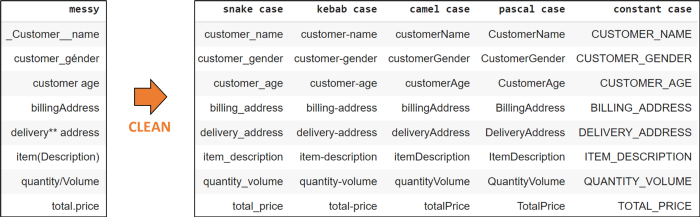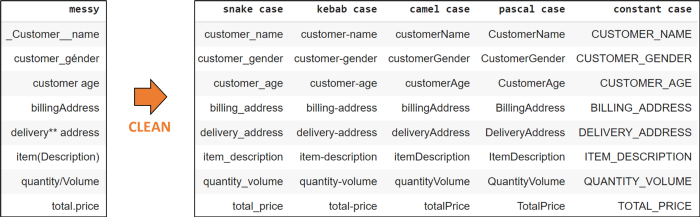

> En general *se tiende* a usar `snake case` dado que coincide con la convención recomendada en la PEP8, y es sencillo acceder a las columnas como si fueran atributos del DataFrame. 

## rename()

In [ ]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df

In [ ]:
df.rename(columns={"A": "a", "B": "c"})

¡La documentación es tu amiga! [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

----------------------------------------------------------

👇🏽 Renombrar las columnas que así lo requieran:
> Construir una función que produzca un diccionario apto para pasar como parámetro al método `rename()`

In [ ]:
sales_df.columns

----------------------------------------------------------

## Functiones

* syntax:

```python
def function_name(parameter1, parameter2, ...):
    """
    docstring
    """
    
    # code
    return <var>  # (opc)
```


![](https://www.informit.com/content/images/chap2_9780134076430/elementLinks/p0215_01.jpg)

----------------------------------------------------------

In [ ]:
def label_to_snake_case(label):
    return label.lower().replace(' ', '_')

In [ ]:
label_to_snake_case('Order ID')

In [ ]:
rename_dict = {}

for label in sales_df.columns:
    rename_dict[label] = label_to_snake_case(label)
    
rename_dict

In [ ]:
sales_df.rename(columns=rename_dict)

In [ ]:
sales_df = sales_df.rename(columns=rename_dict)

----------------------------------------------------------

In [ ]:
sales_df.info()

In [ ]:
sales_df.shape

In [ ]:
sales_df.describe()

❓ ¿Qué información relevante puede extraerse de lo anterior? (de cara a la descripción de los datos y contexto)

👁 ¿Qué columnas requieren limpieza?

----------------------------------------------------------

## Tipos de datos

* **Número**  
    * **Int** (entero), `3`, `598`, `1655`  
    * **Float** (de punto flotante), `1.5`, `2.0`  
    * **Complex** (complejo), `1 + 2j`, `29 + 56j`  
* **String** (cadenas de texto), `'hola'`, `"A"`  
* **Bool**, `True`, `False`  

## Estructuras de datos

* **list**: `[3, 2.0, 'eggs', [True, False]]`
* **tuple**: `(598, 1655)`, `([1.5, True], [2.0, False])` 
* **dict**: `{'spam': 'eggs', 'eggs': 'spam'}`
* **set**: `nums = {1, 2, 2, 3, 4, 4, 5, 5} -> {1, 2, 3, 4, 5}`

![](https://machinelearningmastery.com/wp-content/uploads/2020/06/Overview-of-Data-Variable-Types2.png)

## Numéricos

Este tipo de datos permite calcular de manera directa algunos indicadores de interés general como promedios, máximos, mínimos, media, mediana, etc.

* **entero**: *discreto*
    * Cantidad de hijos
    * Edad
* **flotante**: *continuo*
    * Temperatura
    * Salario
    * Nivel de pH

## Categórico

Este tipo de variable se puede agrupar, formando *categorías*.

* **nominal**: No se puede ordenar.
    * Ocupación
    * Industria
    * Universidad
    * Ciudad
* **ordinal**: Se puede ordenar.
    * Nivel de satisfacción (0-10)
    * Estrellas (1-5)
    * Talles de prendas como 'S', 'M', 'L', XL'
* **booleano**: Sólo dos posibles valores.
    * Yes/No
    * Female/Male
    * Alive/Dead

----------------------------------------------------------

👇🏽 Clasificar los datos en la siguiente tabla:

| Column           	| Python Object class 	| Data type                   	| OBS 	|
|------------------	|---------------------	|-----------------------------	|-----	|
|         Order ID 	| `ìnt`               	| numérico, discreto o entero 	|     	|
| Product          	|                     	|                             	|     	|
| Quantity Ordered 	|                     	|                             	|     	|
| Price Each       	|                     	|                             	|     	|
|       Order Date 	|                     	|                             	|     	|
| Purchase Address 	|                     	|                             	|     	|

👁 ¿`Order ID` es **única** para cada registro?

----------------------------------------------------------

🆕 `pandas.Series.is_unique`

In [ ]:
s1 = pd.Series(['a', 'b', 'c'])
s1

In [ ]:
s1.is_unique

In [ ]:
s2 = pd.Series(['a', 'b', 'c', 'a'])
s2

In [ ]:
s2.is_unique

`pandas.Series.unique`

In [ ]:
s2.unique

----------------------------------------------------------

## drop_duplicates()

¡La documentación es tu amiga! [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

In [ ]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

## 🆕 duplicated()

Genera una Serie booleana

In [ ]:
df.duplicated()

## filter

`df[mask]`, donde `mask` es una Serie o DataFrame compuesto por booleanos

In [ ]:
df[df.duplicated()]

## drop_duplicates()

* `subset`: list, label/s a tener en cuenta para remover duplicados. Por defecto tiene en cuenta TODAS.
* `keep`: {'first', 'last', False}, default 'first'

In [ ]:
df.drop_duplicates()

In [ ]:
df

In [ ]:
df = df.drop_duplicates()
df

----------------------------------------------------------

In [ ]:
sales_df.duplicated()

In [ ]:
sales_df[sales_df.duplicated()]

In [ ]:
sales_df.duplicated().sum()

👇🏽 Eliminar duplicados

In [ ]:
sales_df.drop_duplicates()

In [ ]:
sales_df = sales_df.drop_duplicates()
sales_df

----------------------------------------------------------

## Missing values

## NaN

*Not a Number*. Cuando pandas no puede determinar un *valor numérico* para asignar a una entrada, le asigna `NaN`. Generalmente estos **NO AFECTAN** operaciones aritméticas.


> Nótese que dype es `float64` ya que este tipo de dato admite NaN, no así `int64`.

## is_na()

Detecta NaN en el DatFrame y devuelve un objeto similar con booleanos, donde `True` indica que en ese lugar hay un NaN.

## dropna()

Elimina NaN.

¡OJO! 

Hay que asegurarse de que es correcto "dropear" la data que contiene NaN.

----------------------------------------------------------

In [ ]:
sales_df.isna()

In [ ]:
for label in sales_df.columns:
    print(label)
    print(sales_df[sales_df[label].isna()])
    print()
    print()

In [ ]:
sales_df = sales_df.dropna()

----------------------------------------------------------

## Plot

‘line’ : line plot (default)  
‘bar’ : vertical bar plot  
‘barh’ : horizontal bar plot  
‘hist’ : histogram  
‘box’ : boxplot  
‘kde’ : Kernel Density Estimation plot  
‘density’ : same as ‘kde’  
‘area’ : area plot  
‘pie’ : pie plot  
‘scatter’ : scatter plot (DataFrame only)  
‘hexbin’ : hexbin plot (DataFrame only)  

¡La documentación es tu amiga! [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

## Gráfico de dispersión

¡La documentación es tu amiga! [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)

In [ ]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
                  columns=['length', 'width', 'species'])
ax1 = df.plot.scatter(x='length',
                      y='width',
                      c='DarkBlue')

## outliers

## Distribución normal

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Standard_deviation_diagram_micro.svg/488px-Standard_deviation_diagram_micro.svg.png)

In [ ]:
df = pd.DataFrame(np.random.randn(100, 3), columns=['A', 'B', 'C'])
df

In [ ]:
df.A.hist(bins=50)

In [ ]:
df.A.mean()

In [ ]:
df.A.std()

### 3 desviaciones estandar

In [ ]:
lower_limit = df.A.mean() - 3*df.A.std()
upper_limit = df.A.mean() + 3*df.A.std()
lower_limit, upper_limit

In [ ]:
df[df.A > upper_limit].A

In [ ]:
df[df.A < lower_limit].A

----------------------------------------------------------

In [ ]:
sales_df.columns

In [ ]:
sales_df.price_each, sales_df.quantity_ordered

In [ ]:
sales_df.plot.scatter(x='price_each', y='quantity_ordered')

🤔 `'Quantity Ordered'` > 600?  
🤔 `'Price Each'` < 0?

In [ ]:
sales_df.quantity_ordered.mean()

In [ ]:
sales_df[sales_df.quantity_ordered < 0]

In [ ]:
sales_df[sales_df.quantity_ordered > sales_df['quantity_ordered'].mean()]  #, 3, 10

----------------------------------------------------------

## 📢🆕 apply 

*Aplica* una operación a *toda* la Serie o DataFrame

> ¡PROHIBIDO ITERAR CON FOR!

In [ ]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

In [ ]:
import numpy as np

In [ ]:
df.apply(np.sqrt)

In [ ]:
df.apply(np.sum, axis=0)

In [ ]:
df.apply(np.sum, axis=1)

¡La documentación es tu amiga! [pandas.DataFrame.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

----------------------------------------------------------

## 👁 lambda functions

o funciones *en una línea*

![](https://lh6.googleusercontent.com/80HaCBlu12XeBhtbiOZ2yX7QI0cIlgfaS7UYwMrlYNbYQYqaniUYTDscZAW0_S48i_Li5WNVgFTZ0rag5roGyIHYBMhCsbbuEc-Dj2xJ8Kj7g8-fIlqQMqCH_kWIGqSO_xilMaOK=s0)

In [ ]:
short_version = lambda x, y, z: x * y + z
short_version

In [ ]:
short_version(1, 2, 3)

In [ ]:
def long_version(x, y, z):
    return x * y + z

In [ ]:
long_version(1, 2, 3)

----------------------------------------------------------

In [ ]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

In [ ]:
df.A.apply(lambda x: x**2)

In [ ]:
df.B.apply(lambda x: str(x))

In [ ]:
df.B = df.B.apply(lambda x: str(x))

In [ ]:
df.iloc[0].B

In [ ]:
type(df.iloc[0].B)

----------------------------------------------------------

🤔 `'Quantity Ordered'` > 600?  
🤔 `'Price Each'` < 0?

In [ ]:
sales_df.quantity_ordered.hist(bins=50)

In [ ]:
lower_limit = sales_df.quantity_ordered.mean() - 3 * sales_df.quantity_ordered.std()
upper_limit = sales_df.quantity_ordered.mean() + 3 * sales_df.quantity_ordered.std()
lower_limit, upper_limit

In [ ]:
sales_df[sales_df.quantity_ordered < lower_limit]

In [ ]:
sales_df[(sales_df.quantity_ordered < 0) | (sales_df.quantity_ordered < 1)]

¡Se puede obtener el dato con Order ID!

In [ ]:
sales_df[(sales_df.quantity_ordered < 0) | (sales_df.quantity_ordered < 1)].order_id

In [ ]:
order_id = 193036.0

In [ ]:
sales_df[sales_df.order_id == order_id]

Hay sólo *un producto* con dicho order_id

In [ ]:
sales_df

In [ ]:
sales_df[sales_df.quantity_ordered < 1]

In [ ]:
sales_df[sales_df.quantity_ordered < 1].quantity_ordered

In [ ]:
sales_df.quantity_ordered = sales_df.quantity_ordered.apply(lambda x: 1 if x < 0 else x)

In [ ]:
sales_df[sales_df.quantity_ordered < 1]

In [ ]:
sales_df[(sales_df.quantity_ordered < 0) | (sales_df.quantity_ordered < 1)]

In [ ]:
sales_df.columns

----------------------------------------------------------

| Column           	| Python Object class 	| Data type                   	| OBS 	|
|------------------	|---------------------	|-----------------------------	|-----	|
|         Order ID 	| `ìnt`               	| numérico, discreto o entero 	|     	|
| Product          	|                     	|                             	|     	|
| Quantity Ordered 	|                     	|                             	|     	|
| Price Each       	|                     	|                             	|     	|
|       Order Date 	|                     	|                             	|     	|
| Purchase Address 	|                     	|                             	|     	|

In [ ]:
sales_df.head()

❓ ¿De qué tipo de dato debería ser `order_id`?

* `'Order ID'` *debería* ser un `int`

----------------------------------------------------------

## 📢🆕 astype

Castea una Serie a un tipo de dato dado

> to_datetime   
> to_timedelta  
> to_numeric  

In [ ]:
ser = pd.Series([1, 2], dtype='int32')
ser

In [ ]:
ser.astype('int64')

In [ ]:
ser = pd.Series([1.0, 2.0], dtype='float64')
ser

In [ ]:
ser.astype('int64')

### params

errors : {'raise', 'ignore'}, default 'raise'  
    - ``raise`` : Se detiene y muestra el error  
    - ``ignore`` : Cuando encuentra un error al convertir el dato, retorna el valor original  

In [ ]:
people_df = pd.DataFrame({
    'name': ['Dung', 'Hang', 'Linh', 'Hung'],
    'gender': ['male', 'female', 'female', 'male']
})
people_df

In [ ]:
people_df.gender.astype('category')

¡La documentación es tu amiga! [pandas.Series.astype](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.astype.html)

----------------------------------------------------------

❓ ¿De qué tipo de dato debería ser `quantity_ordered`?

❓ ¿Qué formato tiene `price_each`? ¿En qué moneda está expresado?

❓ ¿Qué formato tiene `order_date`? ¿Qué información puede extraerse de esta Serie?

❓ ¿Qué formato tiene `purchase_address`? ¿Qué información puede extraerse de esta Serie?

In [ ]:
sales_df.columns

In [ ]:
sales_df.order_id.apply(lambda x: int(x))

In [ ]:
sales_df.order_id = sales_df.order_id.apply(lambda x: int(x))

In [ ]:
sales_df.quantity_ordered = sales_df.quantity_ordered.apply(lambda x: int(x))

In [ ]:
sales_df.quantity_ordered

----------------------------------------------------------

## exportar DataFrame

```python
df.to_clipboard()
df.to_csv()
df.to_dict()
df.to_excel()
df.to_hdf()
df.to_html()
df.to_json()
```

### to_csv params

* **path_or_buf**: `str` ruta del archivo destino.
* **sep**: default `','`, `str` criterio de separación
* **na_rep**: default `''`, `str` caracter/es con los cuales reemplazar `NaN`. 
* **columns**: `iterable` columnas a escribir.
* **header**: default `True`, `bool` or `list of str` exportar o no los nombres de columnas, si se especifica una lista, se consideran "aliases" de los nombres existentes.
* **index**: default `True`, `bool` exportar los índices o no.
* **mode**: default `'w'`, `str`.
* **date_format**: `str` formato de fecha a exportar. 
* **decimal**: default `'.'`, `str` criterio de separación decimal.

----------------------------------------------------------

👇🏽 Exportar el DataFrame en el que convergen las ventas de todos los meses

In [ ]:
sales_df.to_csv('all_months_sales.csv', index=False)

----------------------------------------------------------

1) ¿Cuál es el mes que reporta la mayor cantidad de productos? 

In [ ]:
sales_df.order_date

In [ ]:
def get_month(date):
    return date.split('/')[0]

In [ ]:
get_month('08/31/19 22:21')

In [ ]:
def get_month(date):
    return int(date.split('/')[0])

In [ ]:
get_month('08/31/19 22:21')

In [ ]:
sales_df.order_date.apply(get_month)

In [ ]:
sales_df['month'] = sales_df.order_date.apply(get_month)

In [ ]:
sales_df

In [ ]:
sales_df['sale'] = sales_df.price_each * sales_df.quantity_ordered
sales_df['sale']

In [ ]:
sales_df

----------------------------------------------------------

## 📢🆕 groupby

Agrupa los datos del DataFrame en función de un label dado

¡La documentación es tu amiga! [pandas.DataFrame.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [ ]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

In [ ]:
df.groupby(['Animal']).mean()

----------------------------------------------------------

In [ ]:
sales_df.groupby('month').sum()

In [ ]:
sales_by_month = sales_df.groupby('month').sum()
sales_by_month.price_each.max()

In [ ]:
sales_by_month.columns

In [ ]:
sales_by_month.plot.bar(y='sale')

----------------------------------------------------------

4) ¿Qué ciudad reportó la mayor cantidad de ventas?

In [ ]:
sales_df.purchase_address

In [ ]:
'359 Spruce St, Seattle, WA 98101'.split(',')[1].replace(' ', '')

In [ ]:
def get_city(address):
    return address.split(',')[1].replace(' ', '')

In [ ]:
sales_df['city'] = sales_df.purchase_address.apply(get_city)
sales_df['city']

In [ ]:
sales_df

In [ ]:
sales_by_month = sales_df.groupby('city').sum()
sales_by_month.price_each.max()

In [ ]:
sales_by_month.plot.bar(y='sale')

----------------------------------------------------------

Determinar productos que se venden juntos.
¿Cuál es la relación entre el precio del producto más vendido y el del menos vendido?

In [ ]:
sales_df_duplicated = sales_df[sales_df.order_id.duplicated(keep=False)]
sales_df_duplicated

In [ ]:
sales_df_duplicated.groupby('order_id').product.transform(lambda x: ', '.join(x))

In [ ]:
sales_df_duplicated['bundle_products'] = sales_df_duplicated.groupby('order_id').product.transform(lambda x: ', '.join(x))
sales_df_duplicated

In [ ]:
sales_df_duplicated[['order_id', 'bundle_products']]

----------------------------------------------------------

## 📢🆕 crosstab

Esta utilidad de pandas retorna una tabla de datos cruzados que muestran la frecuencia de apareción de ciertos grupos de datos.

In [ ]:
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
              "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one",
              "one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny",
              "shiny", "dull", "shiny", "shiny", "shiny"],
             dtype=object)

pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

----------------------------------------------------------